In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
import math
from sklearn.metrics import roc_auc_score,roc_curve,auc,log_loss,confusion_matrix


In [11]:
data= pd.read_csv("/content/loan (1).csv")
data

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
...,...,...,...,...,...,...,...,...
56,39,Male,Architect,Master's,Married,100000,770,Approved
57,25,Female,Receptionist,High School,Single,32000,570,Denied
58,43,Male,Banker,Bachelor's,Married,95000,760,Approved
59,30,Female,Writer,Master's,Single,55000,650,Approved


In [12]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [13]:
#checking for null values(preprocessing)
data.isnull().sum()

,0
age,0
gender,0
occupation,0
education_level,0
marital_status,0
income,0
credit_score,0
loan_status,0


In [14]:
data.nunique()

,0
age,32
gender,2
occupation,38
education_level,5
marital_status,2
income,40
credit_score,28
loan_status,2


In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':  # Check if column is of object (string) type
        data[col] = label_encoder.fit_transform(data[col])

In [17]:
x= data.drop (['loan_status'], axis=1) #featuer
y=data['loan_status']
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size= 0.25, random_state=0)

In [18]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

# Evaluating the model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))


Accuracy: 0.9375
Precision: 0.8
Recall: 1.0
F1-score: 0.8888888888888888


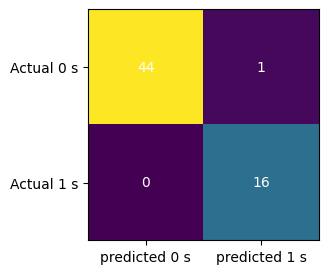

In [19]:
cm=confusion_matrix(y,lr.predict(x))
fig,ax=plt.subplots(figsize=(3,3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('predicted 0 s' , 'predicted 1 s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0 s' , 'Actual 1 s'))
ax.set_ylim(1.5,-0.5)
for i in range (2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='white')


plt.show()

In [20]:

from sklearn.preprocessing import LabelEncoder
import pandas as pd
# Assuming 'x' contains the features used for training
# Replace these values with the actual values you want to predict for
new_data = pd.DataFrame({
    'age': [32],
    'gender': ['Female'],
    'occupation':['Engineer'],
    'education_level':["Master's"],
    'marital_status':['Single'],
    'income':[50000],
    'credit_score':[620]
})
# Apply LabelEncoder to the categorical features in new_data
label_encoder = LabelEncoder()
for col in new_data.columns:
    if new_data[col].dtype == 'object':
        # Note: Using the same label_encoder instance you fitted earlier is crucial
        new_data[col] = label_encoder.fit_transform(new_data[col])
new_prediction = lr.predict(new_data)
print("Predicted loan status:", new_prediction[0])


Predicted loan status: 1
